In [1]:
import numpy as np
import nibabel as nib
%matplotlib inline
import matplotlib.pyplot as plt
import albumentations as ab
from scipy.ndimage.filters import gaussian_filter, sobel
import skimage.transform as skTrans
import matplotlib.colors as matcolors
import seaborn as sns
from matplotlib import gridspec

In [2]:
def load_image(file_path):
    return np.load(file_path)[0,:,:,:,:]

def process_predictions(pred, focus_class):
    classes_num = pred.shape[-1]
    max_ind = np.argmax(pred, axis=-1)
    pred = np.max(pred, axis=-1)
    
    for i in range(0,classes_num):
        if i != focus_class:
            max_ind[max_ind==i] = 0
    
    return pred*max_ind

def plot_image(plt, image, label, index=0, axis=0, class_heat_map=False):
    if axis == 0:
        image = image[index, :, :]
        label = label[index, :, :]
    elif axis == 1:
        image = image[:, index, :]
        label = label[:, index, :]
    else:
        image = image[:, :, index]
        label = label[:, :, index]
    
    colors = ["black","red", "blue"]
    cmap = matcolors.ListedColormap(colors)
    
    plt.imshow(image, interpolation='none')
    
    masked_label = np.ma.masked_where(label == 0.0, label)
        
    if class_heat_map:
        plt.imshow(masked_label, cmap='hot', interpolation='none', vmin=0.0, vmax=1.0)
    else:
        plt.imshow(masked_label, cmap=cmap, interpolation='none', vmin=0.0, vmax=2.0)


def show_image(image, lables_dict, index=0, axis=0, class_heat_map=False, images_per_row=3):
    fig = plt.figure(figsize = (40, 40))
    gs = gridspec.GridSpec(images_per_row, images_per_row)
    plt.rcParams.update({'font.size': 22})
    
    for i, key in enumerate(lables_dict):
        row = int(i/images_per_row)
        col = i%images_per_row
        
        subplot = plt.subplot(gs[i])
        subplot.set_title(key)
        plot_image(subplot, image, lables_dict[key], index, axis, class_heat_map)
        
    plt.show()

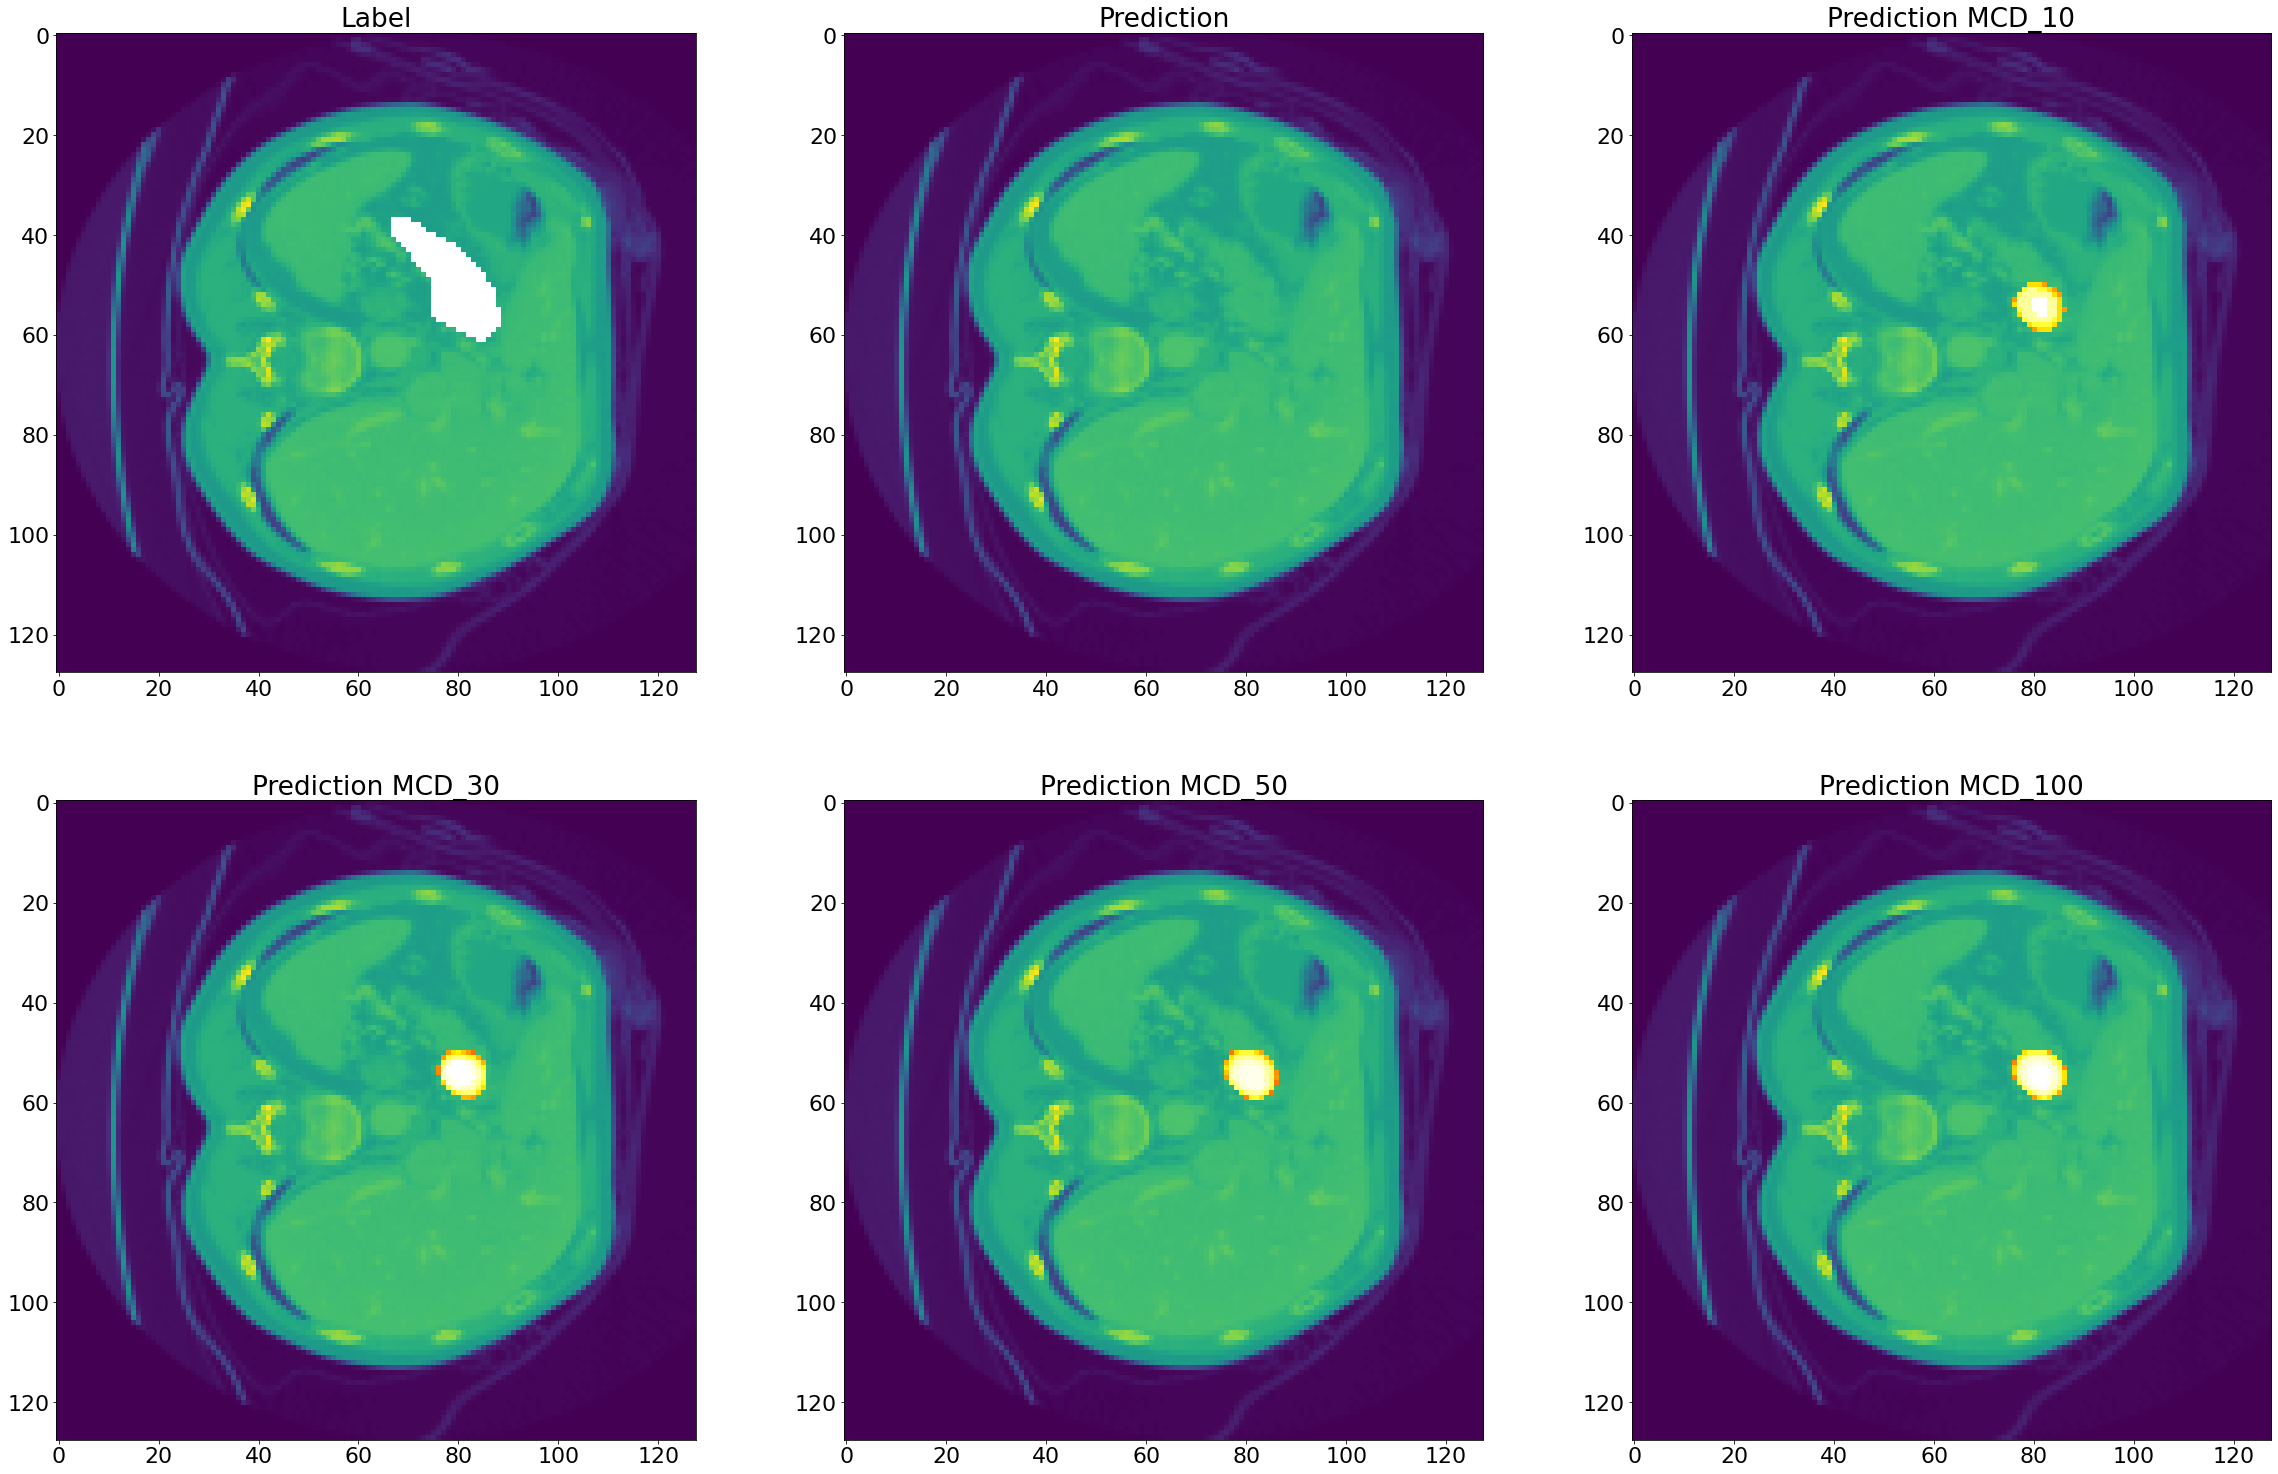

In [6]:
base_path = "/Users/d070867/Desktop/Thesis/results/majority_5_0_dice1"
labels_dict = {}
class_heat_map = True

image = load_image(f"{base_path}/image.npy")

label = load_image(f"{base_path}/label.npy")
if class_heat_map:
    label = process_predictions(label, focus_class=1)
else:
    label = np.argmax(label, axis=-1)
labels_dict['Label'] = label

pred = load_image(f"{base_path}/pred.npy")
pred = np.argmax(pred, axis=-1)
labels_dict['Prediction'] = pred

for i in [10, 30, 50, 100]:
    path = f'{base_path}/{i}/pred_dropout.npy'
    key = f'Prediction MCD_{i}'
    
    if class_heat_map:
        labels_dict[key] = process_predictions(load_image(path), focus_class=1) / i
    else:
        labels_dict[key] = np.argmax(load_image(path), axis=-1)

show_image(image,labels_dict, 87, 2, class_heat_map=class_heat_map)

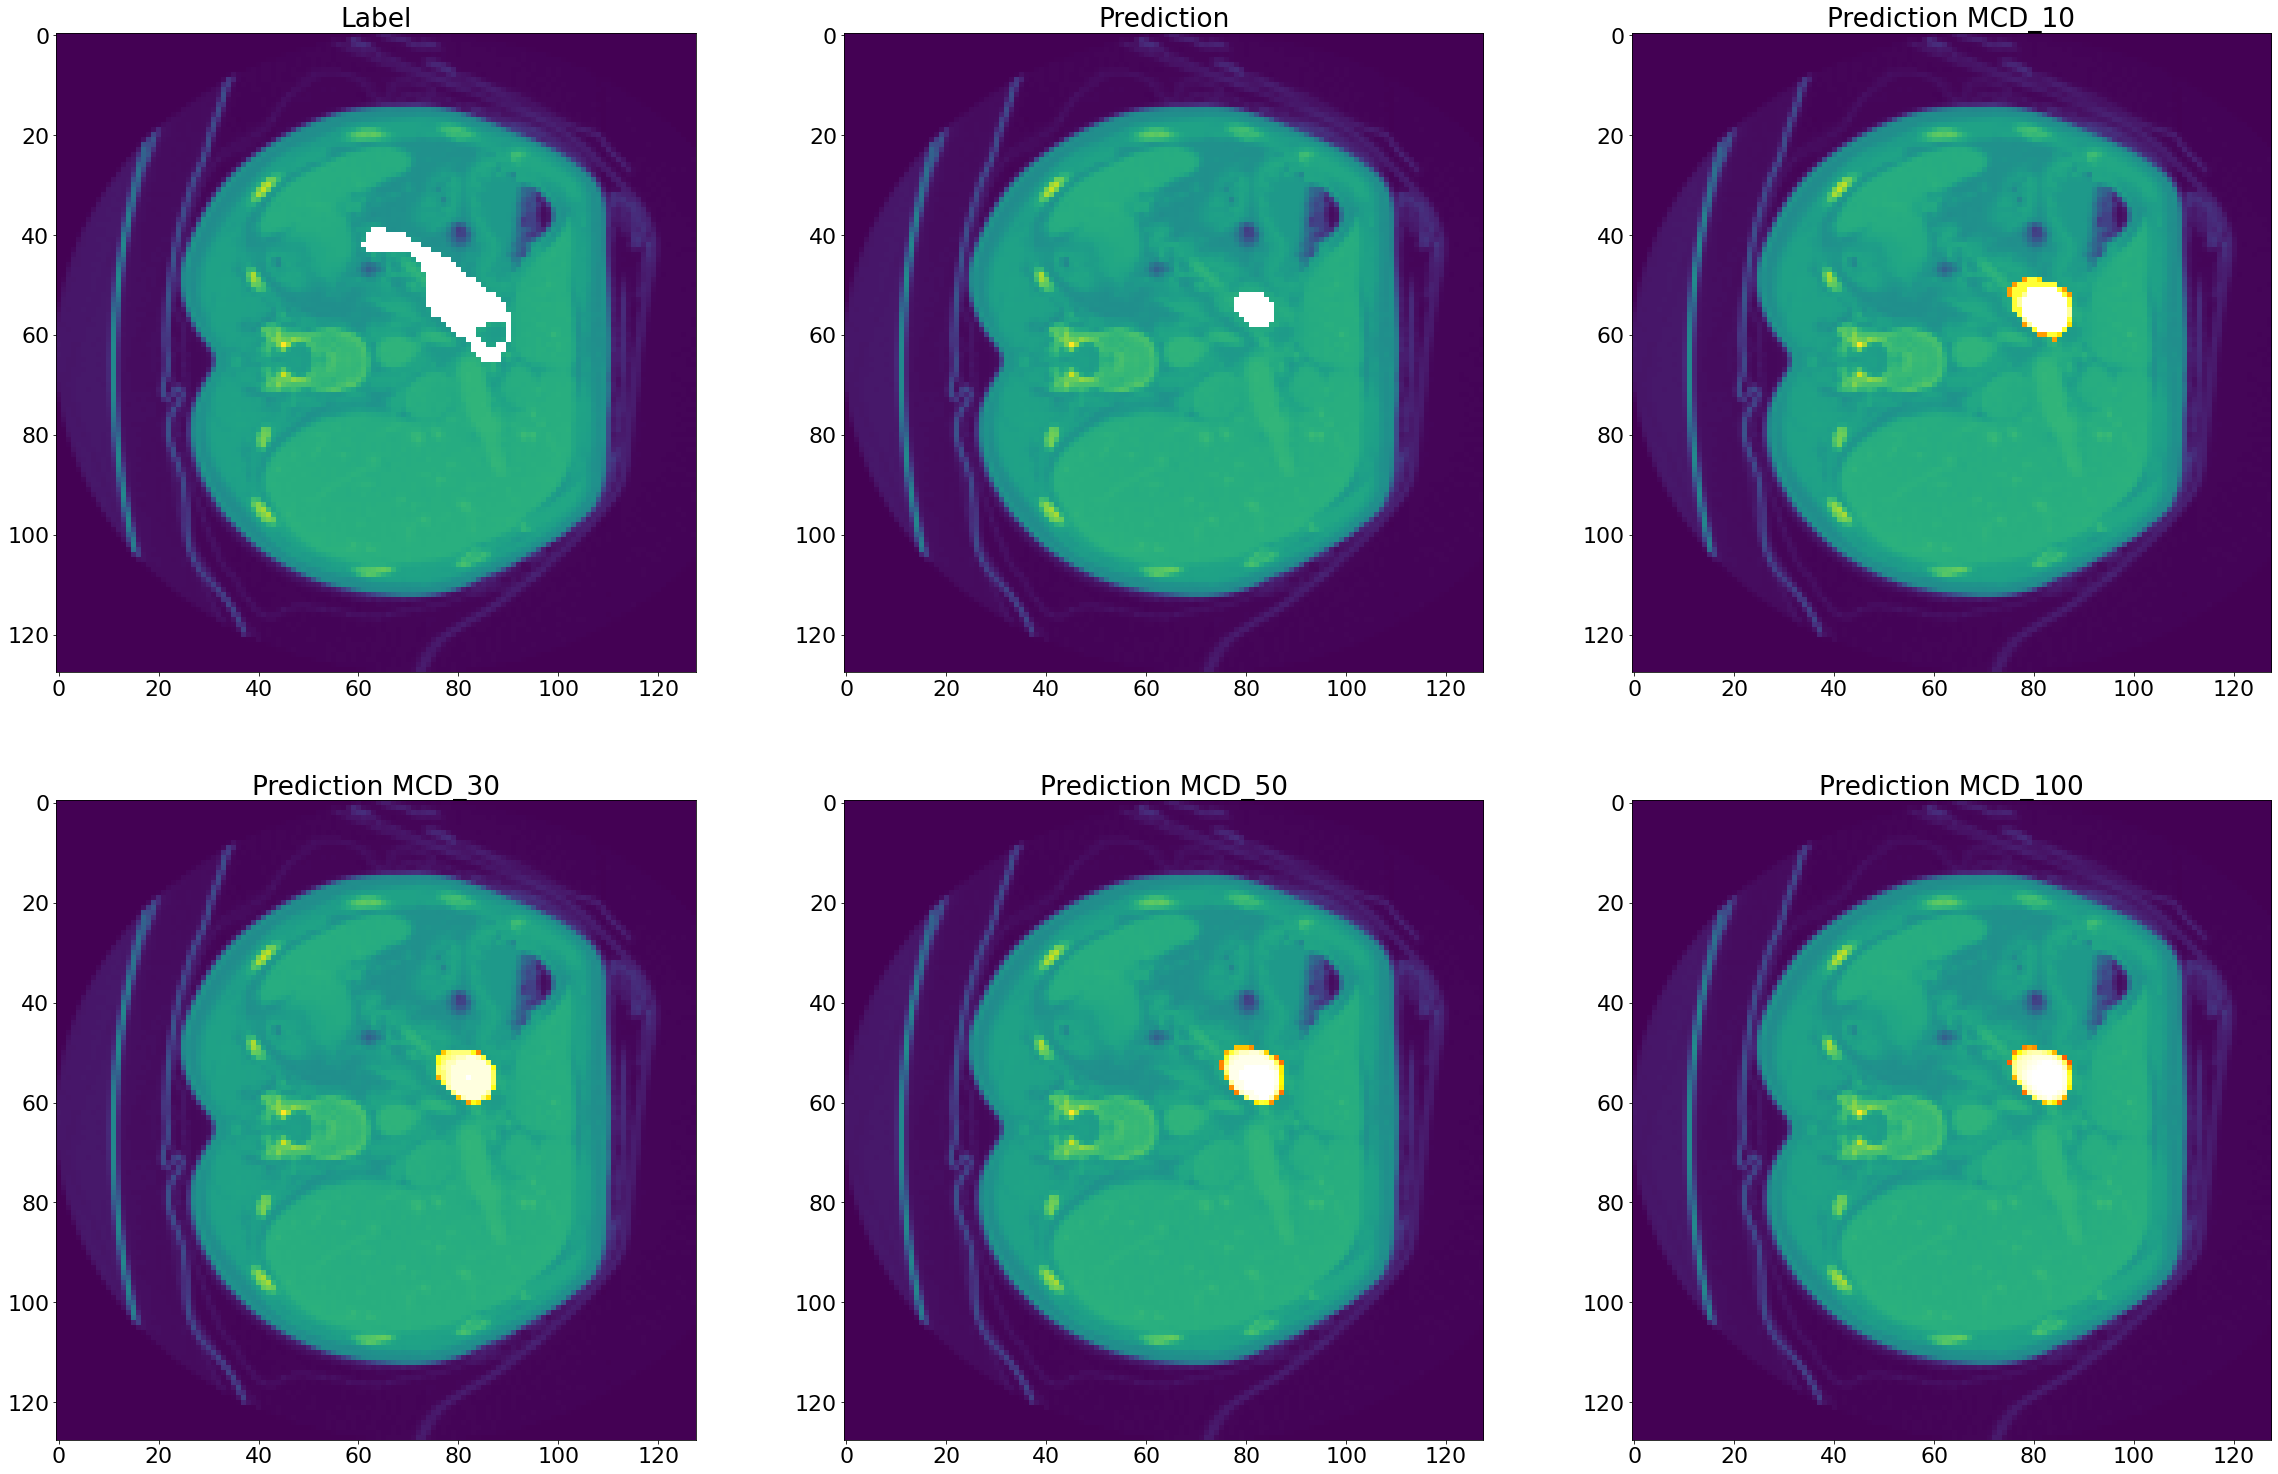

In [7]:
base_path = "/Users/d070867/Desktop/Thesis/results/majority_5_0_dice1"
labels_dict = {}
class_heat_map = True

image = load_image(f"{base_path}/image.npy")

label = load_image(f"{base_path}/label.npy")
if class_heat_map:
    label = process_predictions(label, focus_class=1)
else:
    label = np.argmax(label, axis=-1)
labels_dict['Label'] = label

pred = load_image(f"{base_path}/pred.npy")
pred = np.argmax(pred, axis=-1)
labels_dict['Prediction'] = pred

for i in [10, 30, 50, 100]:
    path = f'{base_path}/{i}/pred_dropout.npy'
    key = f'Prediction MCD_{i}'
    
    if class_heat_map:
        labels_dict[key] = process_predictions(load_image(path), focus_class=1) / i
    else:
        labels_dict[key] = np.argmax(load_image(path), axis=-1)

show_image(image,labels_dict, 80,2, class_heat_map=class_heat_map)